# Finch Carr - Lab 05
## A) Looking at the Data

In [19]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [43]:
pickle_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs = pk.load(pickle_higgs)
print(higgs.ndim, higgs.size)
higgs

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [48]:
pickle_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd = pk.load(pickle_qcd)
print(qcd.ndim, qcd.size)
qcd.rename(columns={"pt":'pt'}, inplace=True)
qcd

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


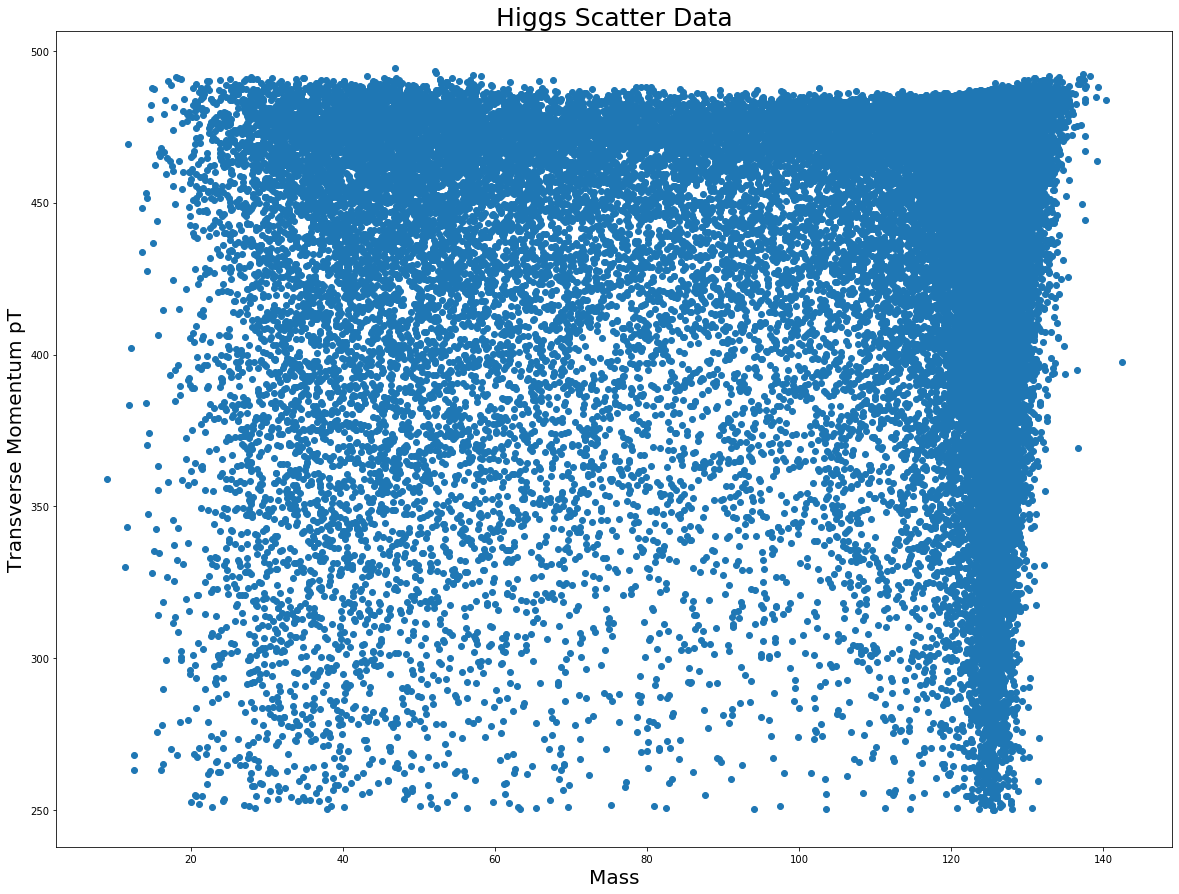

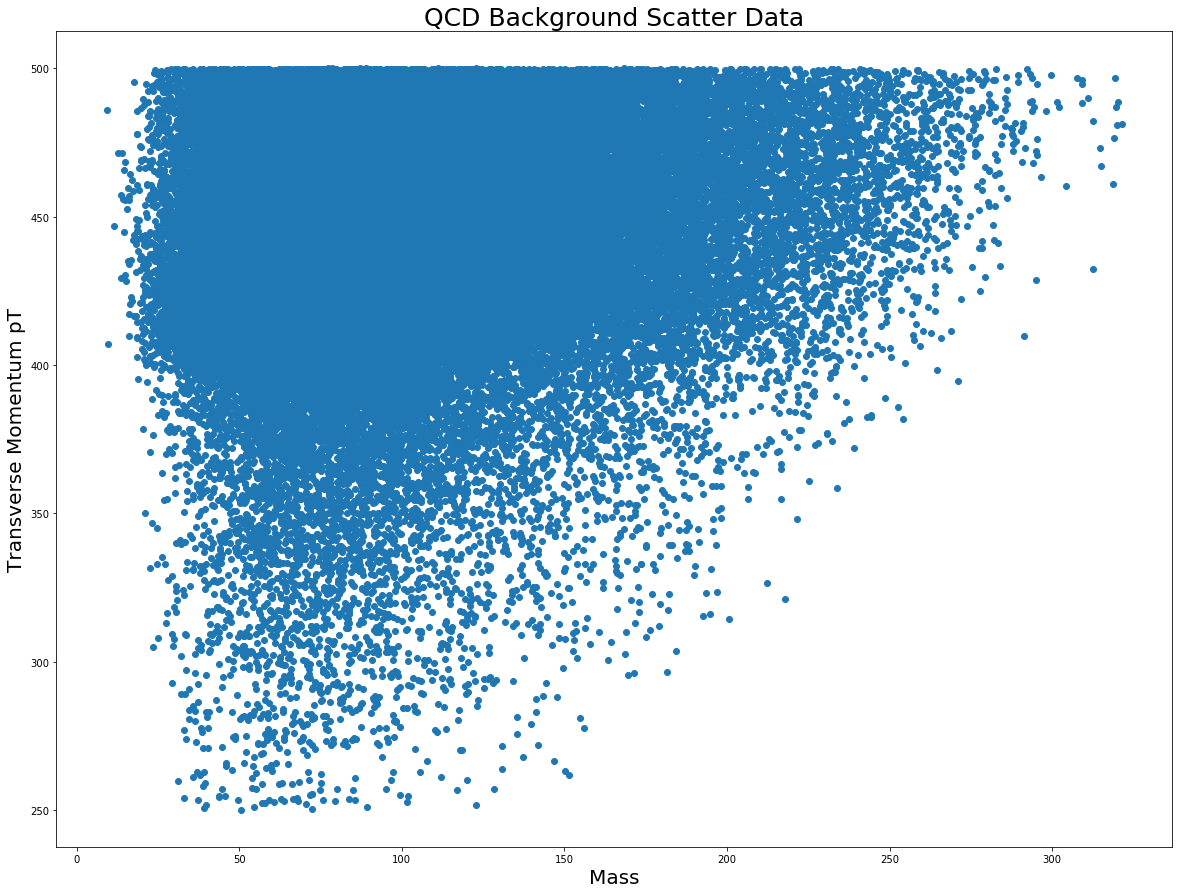

In [84]:
hMass = higgs['mass']
hPt = higgs['pt']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(hMass, hPt)
plt.xlabel('Mass', size =20)
plt.ylabel('Transverse Momentum pT', size=20)
plt.title('Higgs Scatter Data', size=25)

# Do the same for the background data
qcdMass = qcd['mass']
qcdPt = qcd['pt']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(qcdMass, qcdPt)
plt.xlabel('Mass', size =20)
plt.ylabel('Transverse Momentum pT', size=20)
plt.title('QCD Background Scatter Data', size=25)

plt.show()

- Want to apply a mass window to the higgs data that will get rid of a lot of false positive measurements and keep a significant amount of true higgs measurements

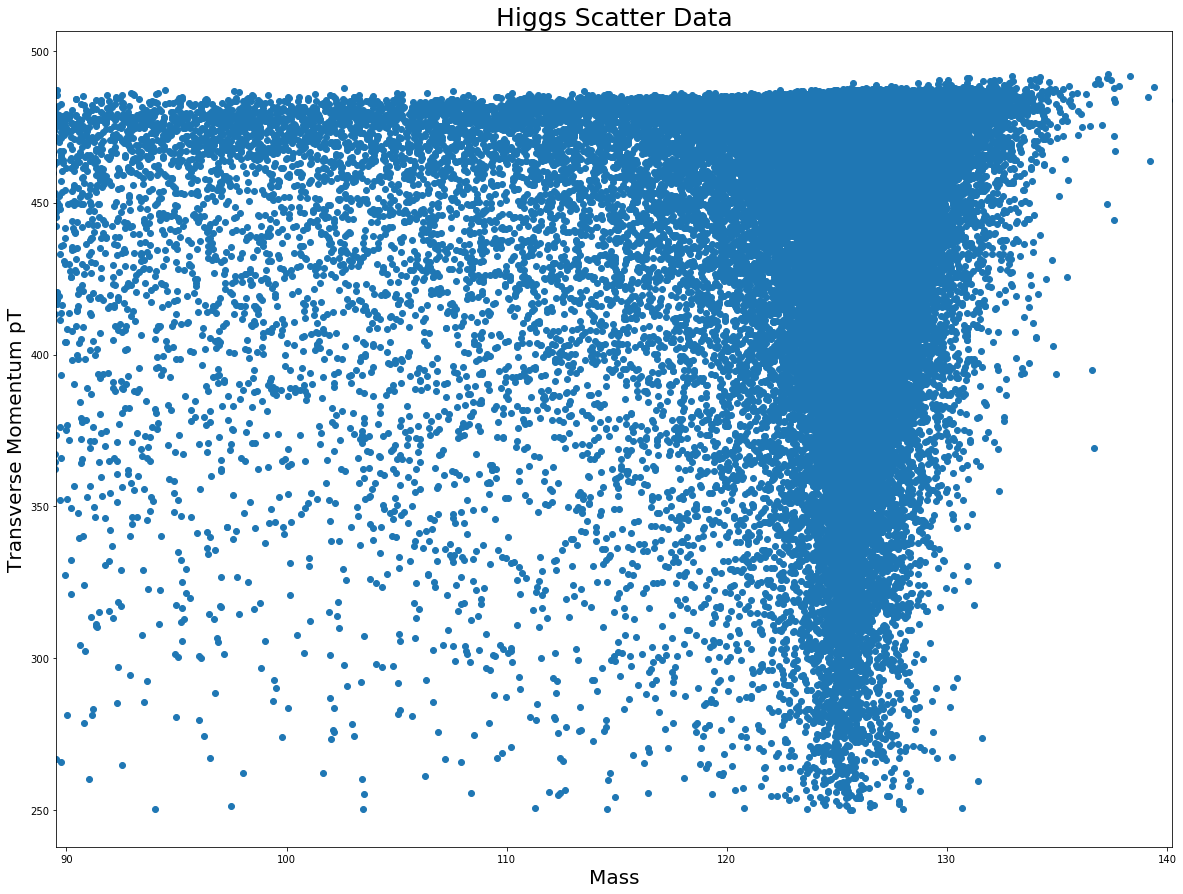

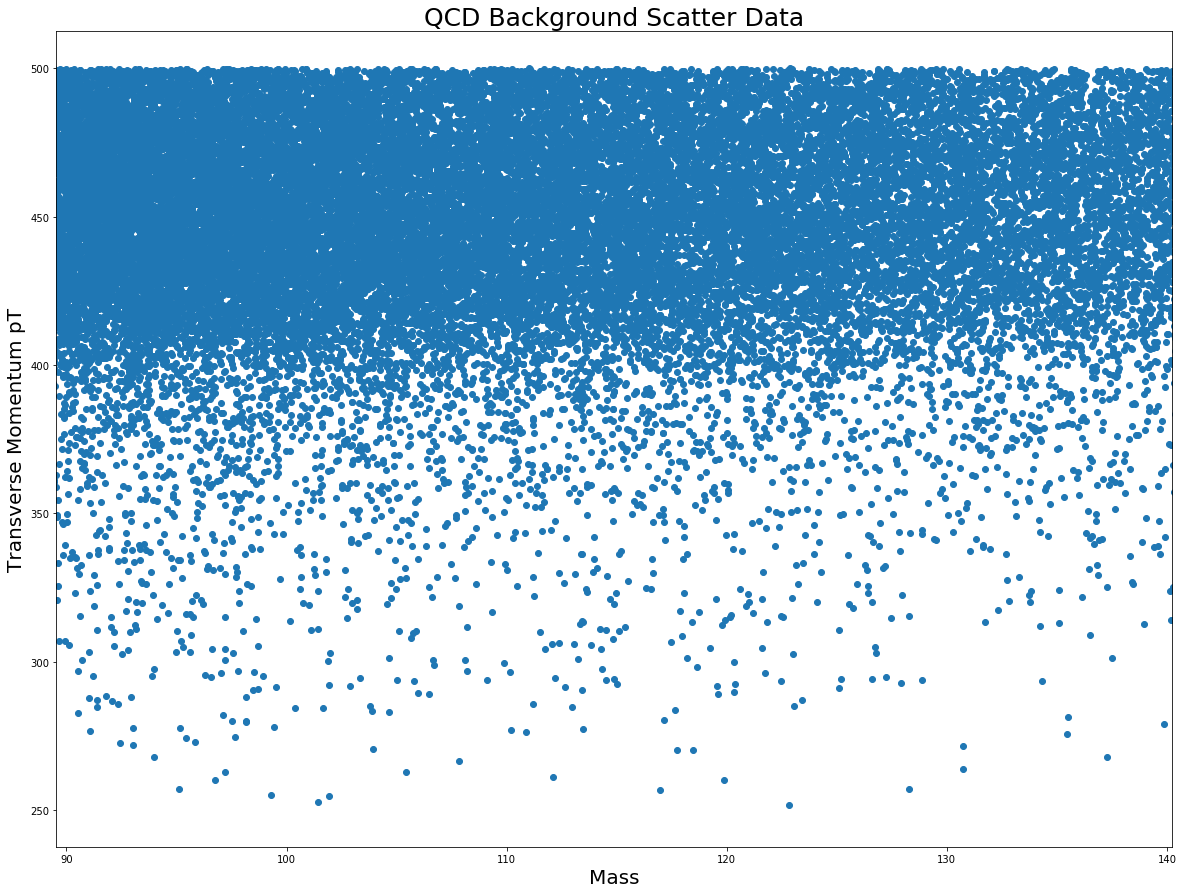

In [88]:
# Higgs plot with tight mass window
MeanM = hMassSort.mean()
StdM = hMassSort.std()

fig, ax = plt.subplots(1,1)
ax.scatter(hMass, hPt)
plt.xlabel('Mass', size =20)
plt.ylabel('Transverse Momentum pT', size=20)
plt.title('Higgs Scatter Data', size=25)
plt.xlim(MeanM-StdM, MeanM+StdM)

# QCD Plot with tight mass window
qcdMass = qcd['mass']
qcdPt = qcd['pt']

fig, ax = plt.subplots(1,1)

ax.scatter(qcdMass, qcdPt)
plt.xlabel('Mass', size =20)
plt.ylabel('Transverse Momentum pT', size=20)
plt.title('QCD Background Scatter Data', size=25)
plt.xlim(MeanM-StdM, MeanM+StdM)

plt.show()

In [93]:
# We also want to make new higgs data table with mass window applied
upper = MeanM + StdM
lower = MeanM - StdM

masswindow=[]
MWpt=[]
for i in range(len(hMassSort)):
    if hMassSort[i] <= (upper) and hMassSort[i] >= (lower):
        masswindow.append(hMassSort[i])
        MWpt.append(hPt[i])
len(masswindow),

(86710, 100000)

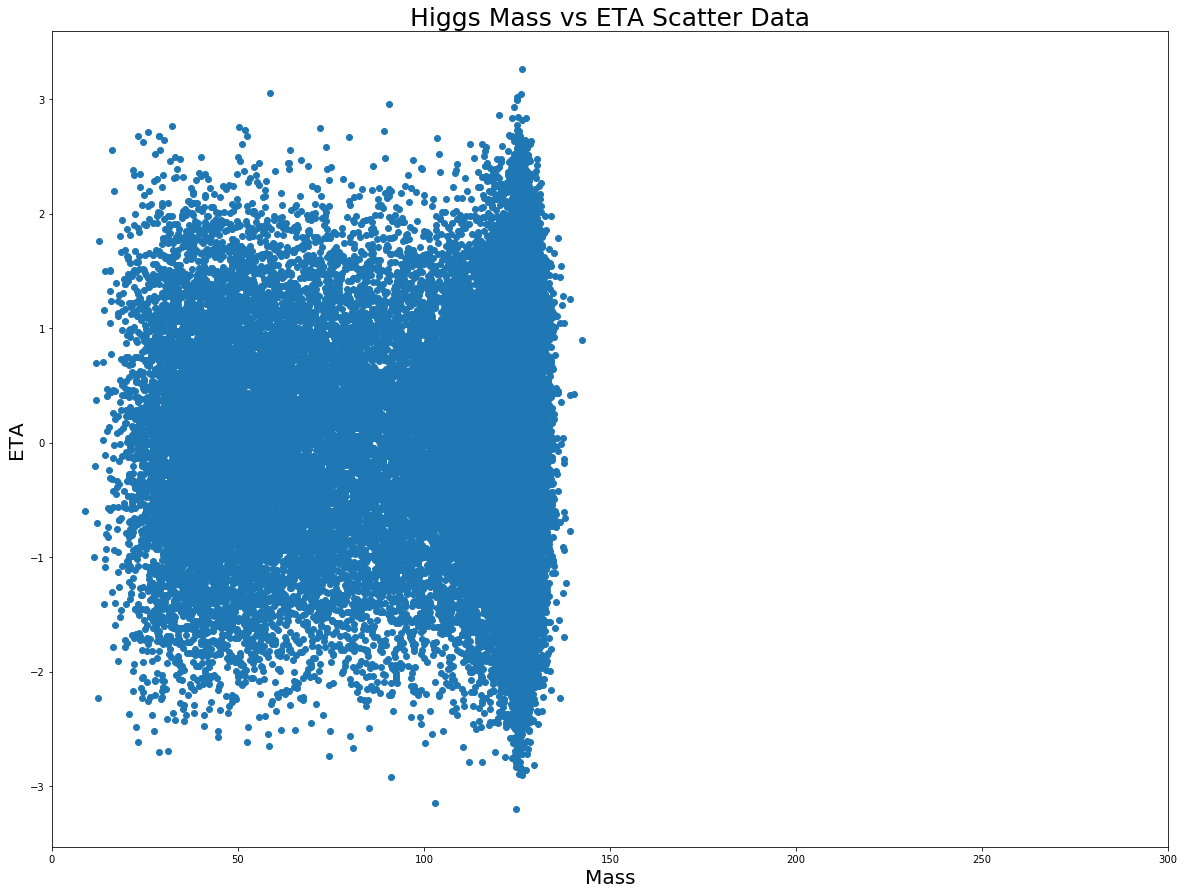

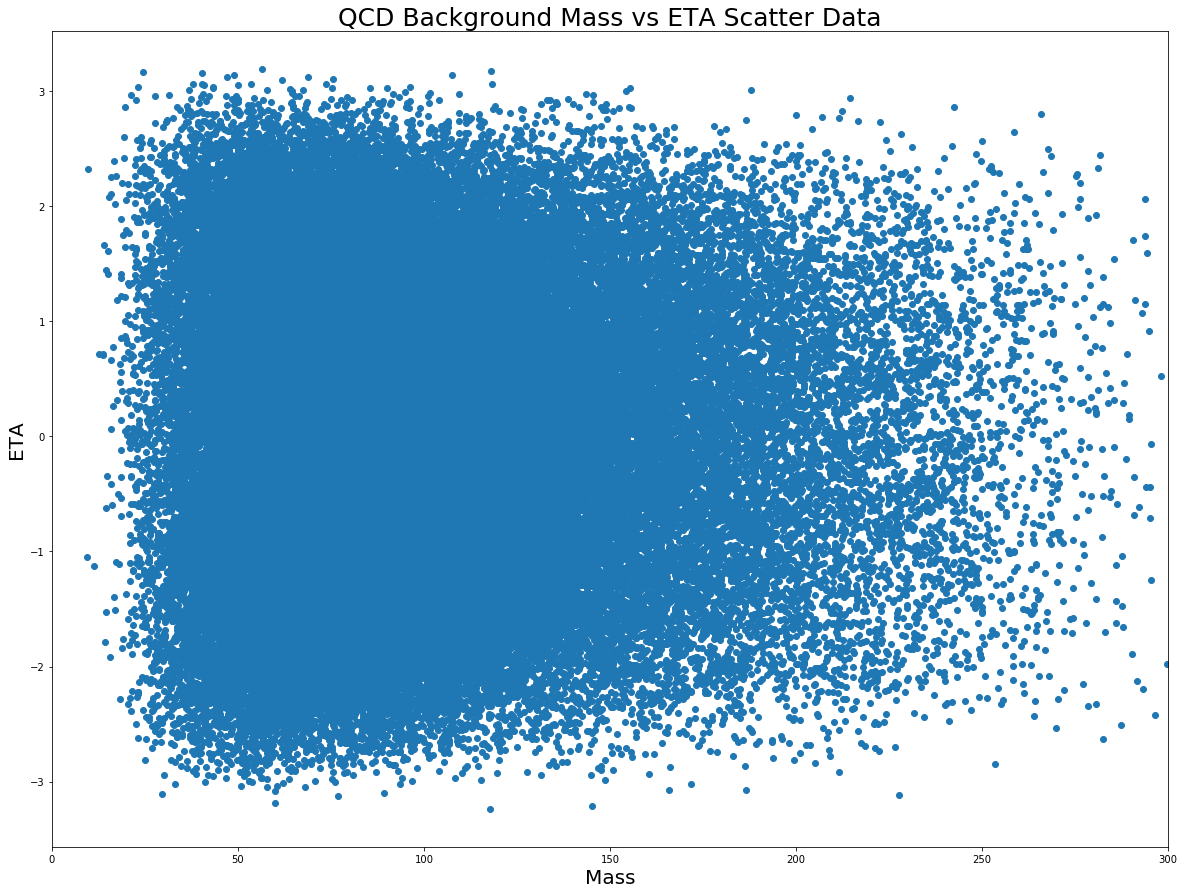

In [115]:
hETA = higgs['eta']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(hMass, hETA)
plt.xlabel('Mass', size =20)
plt.ylabel('ETA', size=20)
plt.xlim(0,300)
plt.title('Higgs Mass vs ETA Scatter Data', size=25)

# Do the same for the background data
qcdETA = qcd['eta']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(qcdMass, qcdETA)
plt.xlabel('Mass', size =20)
plt.ylabel('ETA', size=20)
plt.xlim(0,300)
plt.title('QCD Background Mass vs ETA Scatter Data', size=25)

plt.show()

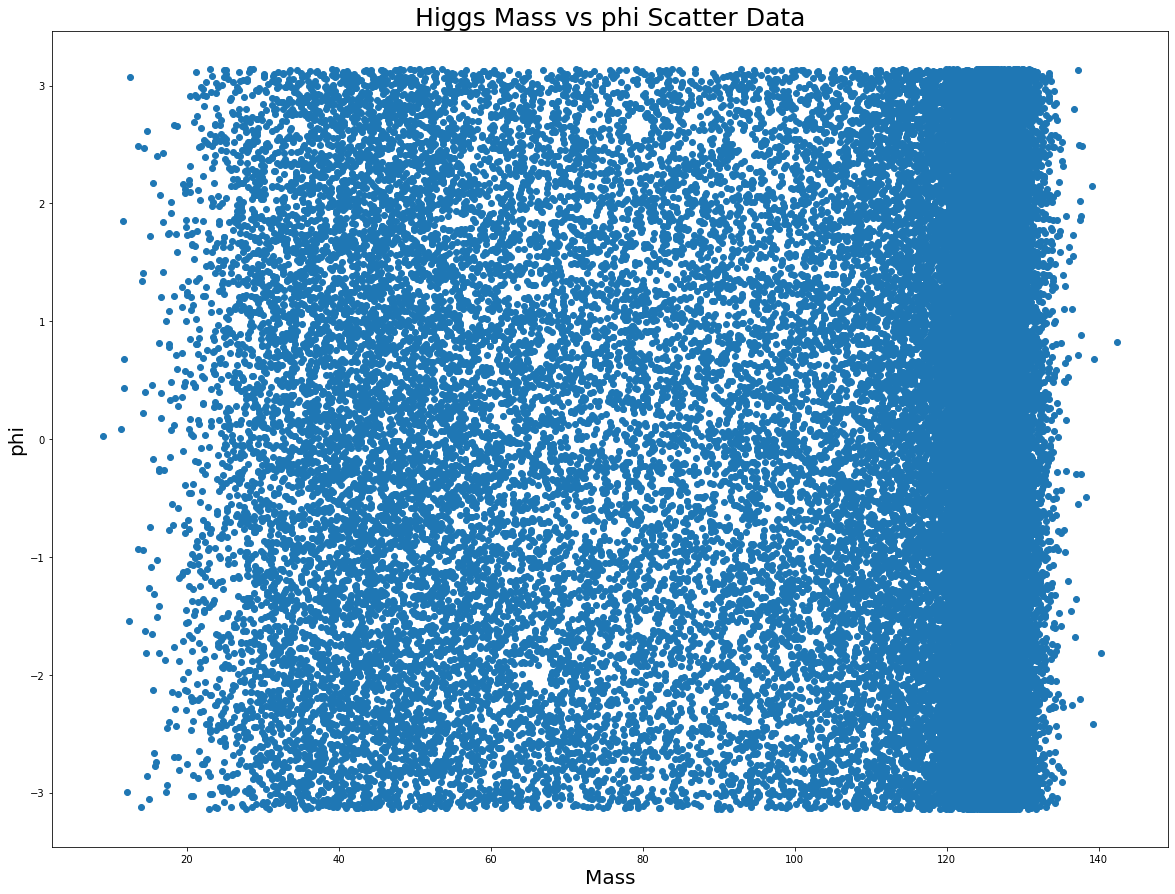

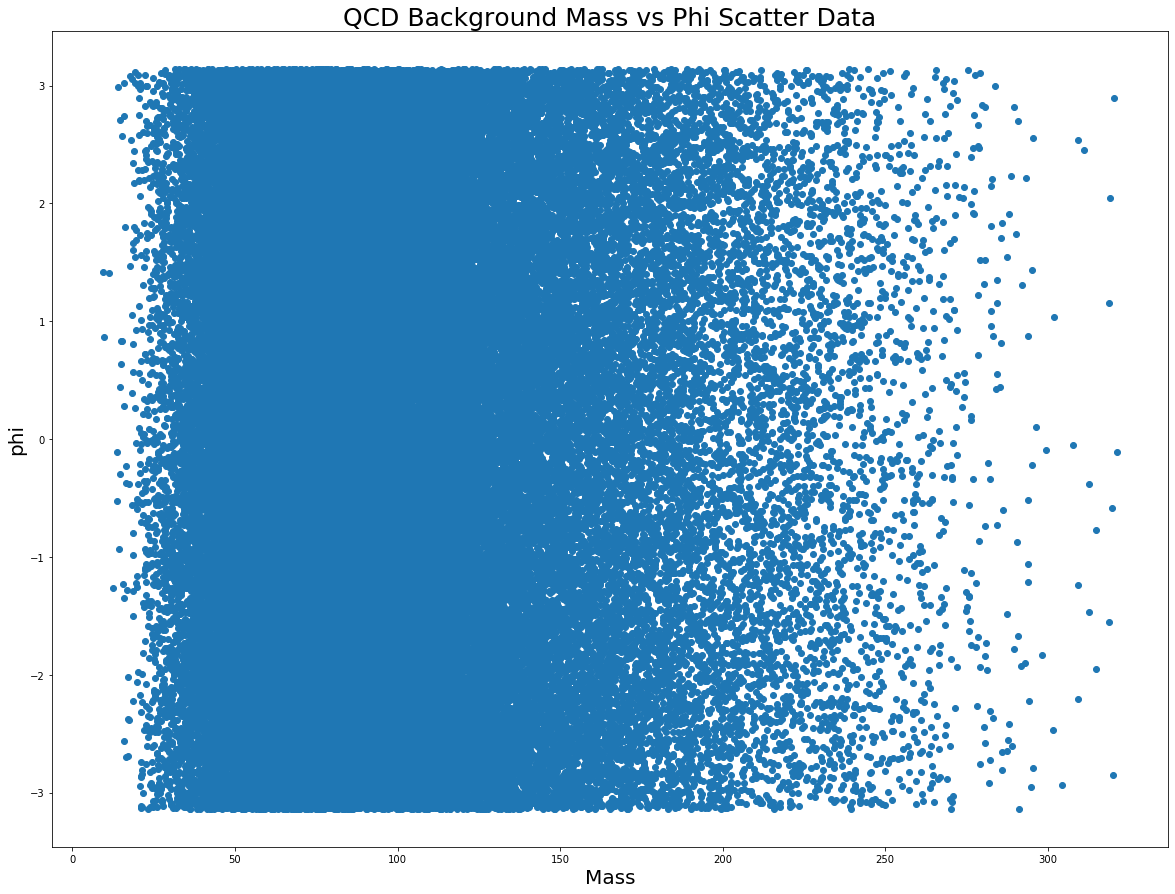

In [117]:
hPhi = higgs['phi']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(hMass, hPhi)
plt.xlabel('Mass', size =20)
plt.ylabel('phi', size=20)
#plt.xlim(0,300)
plt.title('Higgs Mass vs phi Scatter Data', size=25)

# Do the same for the background data
qcdPhi = qcd['phi']

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(qcdMass, qcdPhi)
plt.xlabel('Mass', size =20)
plt.ylabel('phi', size=20)
# plt.xlim(0,300)
plt.title('QCD Background Mass vs Phi Scatter Data', size=25)

plt.show()

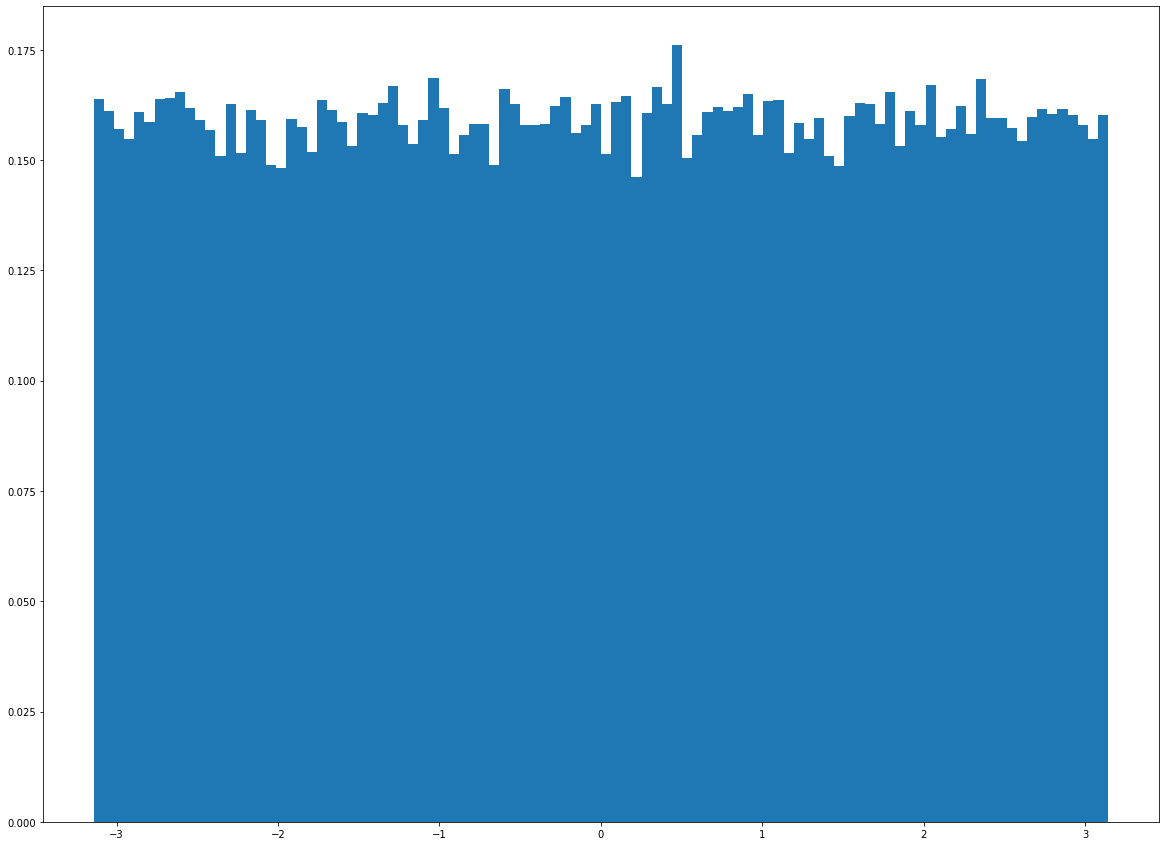

In [121]:
fig, ax = plt.subplots(1,1)
ax.hist(hPhi, bins=100, density=True, label='Phi Probability Histogram')
plt.show()
# Phi is uniformly distributed as a variable in the data it is correlated to nothing probably